<a href="https://colab.research.google.com/github/Starsa/thinkful_challenges/blob/master/UnsupervisedLearningCapstone_BroadwayShows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *On Broadway*
    A backstage look into Broadway 🎭

<img src="https://cdn-0.studybreaks.com/wp-content/uploads/2019/07/Broadway.jpg" width = "400" height="300">

**The "who's who" of Broadway Shows.** <br>
What can we learn by looking at a shows gross potential and attendance?

## The DATA
This is a [dataset of Broadway shows](https://corgis-edu.github.io/corgis/csv/broadway/), grouped over weeklong periods dating back to the 1990s. 
The dataset is made available by the Broadway League (the national trade association for the Broadway industry), and you can view the data [here](http://www.broadwayleague.com/).

The data includes weekly statistics including:
 * Attendence - Total number of people who attended the show
 * Capacity - The amount of people the theatre can hold
 * Day - The day of the week ending
 * Month - The month of the show
 * Year - The year (dating back to 1990)
 * Gross - The gross amount the show made over the course of the week (measured in dollars)
 * Gross Potential - Percentage of maximum amount the show can make (algorithm using capacity, tickets, etc.)
 * Name - The name of the show
 * Performances - The number of performances that week
 * Theatre - The name of the theater
 * Type - The category of show (Musical, Play, or Special)


## What and why?
Using clustering techniques to provide insights into broadway show's
* Future theatre bookings based on revenue
* Present ivestment opportunities for producers
* Compare publicity and marketing

## Review the data

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#set display options so we can view our data to clean
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', (999))


In [ ]:
#mount google drive so for access to csv with dataset

from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#read in the csv and get shape of dataset
broadway = pd.read_csv('/content/drive/My Drive/Thinkful/CapstoneProjects/broadway.csv')
broadway.shape

(31296, 12)

In [ ]:
#look at data types, nulls and data
broadway.info()

broadway.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
Attendance         31296 non-null int64
Capacity           31296 non-null int64
Day                31296 non-null int64
Full               31296 non-null object
Gross              31296 non-null int64
Gross Potential    31296 non-null int64
Month              31296 non-null int64
Name               31296 non-null object
Performances       31296 non-null int64
Theatre            31296 non-null object
Type               31296 non-null object
Year               31296 non-null int64
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,08/26/1990,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,03/24/1991,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,03/31/1991,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,04/07/1991,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,04/14/1991,573981,0,4,Miss Saigon,4,Broadway,Musical,1991


In [ ]:
#look at details of all data
broadway.describe(include="all")

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
count,31296.000000,31296.000000,31296.000000,31296,3.129600e+04,31296.000000,31296.000000,31296,31296.000000,31296,31296,31296.000000
unique,NaN,NaN,NaN,1327,NaN,NaN,NaN,820,NaN,56,3,NaN
top,NaN,NaN,NaN,04/08/2012,NaN,NaN,NaN,The Phantom Of The Opera,NaN,Majestic,Musical,NaN
freq,NaN,NaN,NaN,39,NaN,NaN,NaN,1053,NaN,1053,22551,NaN
mean,8010.523006,80.738912,15.720859,NaN,5.960688e+05,62.404045,6.509043,NaN,7.224821,NaN,NaN,2005.875128
std,3189.873933,18.842815,8.817000,NaN,3.809796e+05,28.714589,3.430321,NaN,2.235376,NaN,NaN,6.100118
min,24.000000,10.000000,1.000000,NaN,1.037000e+03,0.000000,1.000000,NaN,0.000000,NaN,NaN,1990.000000
25%,5508.000000,70.000000,8.000000,NaN,3.201085e+05,45.000000,4.000000,NaN,8.000000,NaN,NaN,2001.000000
50%,7801.500000,83.000000,16.000000,NaN,5.145200e+05,63.000000,6.000000,NaN,8.000000,NaN,NaN,2006.000000
75%,10348.000000,95.000000,23.000000,NaN,7.852690e+05,82.000000,10.000000,NaN,8.000000,NaN,NaN,2011.000000


# Clean

In [ ]:
#rename columns for ease of use
broadway.columns = broadway.columns.str.strip().str.lower()

#drop "full"
#this column has missing values and some information is already provided in other variables
broadway = broadway.drop("full", axis=1)

In [ ]:
#making sense of some outliers
broadway.loc[broadway['capacity']>100]

,attendance,capacity,day,gross,gross potential,month,name,performances,theatre,type,year
5,14076,101,21,706793,0,4,Miss Saigon,8,Broadway,Musical,1991
6,14065,101,28,714968,0,4,Miss Saigon,8,Broadway,Musical,1991
7,14064,101,5,730765,0,5,Miss Saigon,8,Broadway,Musical,1991
11,14016,101,2,774412,0,6,Miss Saigon,8,Broadway,Musical,1991
12,14088,101,9,771767,0,6,Miss Saigon,8,Broadway,Musical,1991
...,...,...,...,...,...,...,...,...,...,...,...
31238,9816,102,31,1462531,97,7,The Book Of Mormon,9,Eugene O'Neill,Musical,2016
31254,10756,102,7,2062862,106,8,Hamilton,8,Richard Rodgers,Musical,2016
31263,8735,102,7,1326562,99,8,The Book Of Mormon,8,Eugene O'Neill,Musical,2016
31279,10756,102,14,2045095,105,8,Hamilton,8,Richard Rodgers,Musical,2016


In [ ]:
broadway2 = broadway.loc[broadway['capacity']<=100]
broadway2.shape

(29167, 11)

In [ ]:
#making sense of some outliers
broadway.loc[broadway['gross potential']>100]

,attendance,capacity,day,gross,gross potential,month,name,performances,theatre,type,year
167,8731,100,1,360077,101,8,The Sisters Rosensweig,8,Ethel Barrymore,Play,1993
169,8756,100,8,364650,102,8,The Sisters Rosensweig,8,Ethel Barrymore,Play,1993
171,8725,100,15,365146,102,8,The Sisters Rosensweig,8,Ethel Barrymore,Play,1993
173,8721,99,22,360052,101,8,The Sisters Rosensweig,8,Ethel Barrymore,Play,1993
536,8000,102,11,395935,103,6,Hamlet 95,8,Belasco,Play,1995
...,...,...,...,...,...,...,...,...,...,...,...
31228,10755,102,31,2041865,105,7,Hamilton,8,Richard Rodgers,Musical,2016
31243,8209,98,31,1042654,102,7,Waitress,8,Brooks Atkinson,Musical,2016
31244,14484,97,31,1899742,107,7,Wicked,8,Gershwin,Musical,2016
31254,10756,102,7,2062862,106,8,Hamilton,8,Richard Rodgers,Musical,2016


In [ ]:
#making sense of some outliers
broadway.loc[broadway['gross potential']==0]

,attendance,capacity,day,gross,gross potential,month,name,performances,theatre,type,year
0,5500,88,26,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,573981,0,4,Miss Saigon,4,Broadway,Musical,1991
...,...,...,...,...,...,...,...,...,...,...,...
19466,7817,53,7,595000,0,12,Young Frankenstein,8,Hilton Theatre,Musical,2008
19499,7676,52,14,550000,0,12,Young Frankenstein,8,Hilton Theatre,Musical,2008
19531,7723,53,21,550000,0,12,Young Frankenstein,8,Hilton Theatre,Musical,2008
19562,11826,81,28,785000,0,12,Young Frankenstein,8,Hilton Theatre,Musical,2008


In [ ]:
broadway3 = broadway.loc[broadway['gross potential']<=100]
broadway3.shape

(28550, 11)

In [ ]:
broadway3 = broadway3.loc[broadway3['capacity']<=100]
broadway3.shape

(27734, 11)

In [ ]:
broadway = broadway3

In [ ]:
#keeping this because specials will sometimes perform more frequently over holiday season
broadway.loc[broadway['performances']>8]

,attendance,capacity,day,gross,gross potential,month,name,performances,theatre,type,year
378,13943,89,1,758960,0,1,Miss Saigon,9,Broadway,Musical,1995
786,10548,97,31,735537,0,12,Smokey Joe'S Cafe,9,Virginia,Musical,1995
1629,17984,95,8,1023030,0,12,Dreams And Nightmares,9,Martin Beck,Special,1996
1657,20034,99,15,1213791,0,12,Dreams And Nightmares,15,Martin Beck,Special,1996
1684,20177,100,22,1230342,0,12,Dreams And Nightmares,15,Martin Beck,Special,1996
1708,13219,99,29,727685,0,12,Cats,9,Winter Garden,Musical,1996
1711,21631,100,29,1315753,0,12,Dreams And Nightmares,16,Martin Beck,Special,1996
1712,9836,100,29,568758,0,12,Grease,9,Eugene O'Neill,Musical,1996
1722,15363,89,29,912276,0,12,Show Boat,9,Gershwin,Musical,1996
3010,3972,88,21,159276,64,12,A View From The Bridge,9,Criterion,Play,1997


Looking at the describe function, there is'nt much cleaning required.
There are no visibile missing values to impute, will go on to feature engineering to review more closely.

# Feature Engineering
First look at string variables to see if any of them can convert to a numeric value.
Then review numeric values and handle outliers.

### Broadway Types (i.e. Musical, Play)

In [ ]:
broadway.type.value_counts()

Musical    19520
Play        7902
Special      312
Name: type, dtype: int64

In [ ]:
#we will use "type" as a y value to compare our clusters with
#convert the strings to numeric
y = broadway['type'].replace("Play", 0).replace("Musical", 1).replace("Special",2)
y.value_counts()

1    19520
0     7902
2      312
Name: type, dtype: int64

### Broadway Theaters

In [ ]:
broadway.theatre.nunique()

56

In [ ]:
#there should be less than 45 theaters.
#will clean theaters to current name
#first clean names for ease of use
broadway['theatre'] = broadway['theatre'].str.strip().replace('""', "")

In [ ]:
#replace old names with new names and clean up duplicates
broadway['theatre'] = broadway['theatre'].replace(("Henry Miller (Rndabt)","Henry Miller", "Kit Kat Klub"), "Stephen Sondheim" ).replace(
    ("Ford Center (Livent)", "Ford Center (Tcn)"), "Ford Center").replace(
    "Cadillac Winter Garden", "Winter Garden").replace("Studio 54 ('98)", "Studio 54").replace((
    "Ford Center (Livent)", "Ford Center (Tcn)", "Ford Center", "Hilton Theatre", "Foxwoods"),"Lyric").replace(
    "Biltmore", "Friedman").replace("Martin Beck", "Al Hirschfeld").replace("Royale", "Jacobs").replace(
    "Plymouth", "Schoenfeld").replace("Virginia", "August Wilson")

In [ ]:
#this looks good
broadway.theatre.value_counts()

Majestic                973
Broadway                972
Ambassador              920
Palace                  919
Helen Hayes             867
Winter Garden           846
Vivian Beaumont         830
Imperial                830
Lunt-Fontanne           826
Al Hirschfeld           808
Walter Kerr             799
Shubert                 788
August Wilson           784
Ethel Barrymore         758
Golden                  738
Nederlander             732
Minskoff                729
St. James               719
Richard Rodgers         719
Marquis                 713
Jacobs                  701
Lyric                   684
Booth                   682
Neil Simon              675
Schoenfeld              647
American Airlines       622
Music Box               619
Studio 54               618
Brooks Atkinson         615
Broadhurst              602
Circle In The Square    573
Eugene O'Neill          552
Gershwin                543
Lyceum                  542
New Amsterdam           519
Friedman            

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
broadway["theatre_cat"] = lbe.fit_transform(broadway['theatre'])
broadway.theatre_cat.describe()

count    27734.000000
mean        20.410759
std         12.062205
min          0.000000
25%          9.000000
50%         21.000000
75%         31.000000
max         40.000000
Name: theatre_cat, dtype: float64

### Broadway Show Names

In [ ]:
#see if we can find any errors in data collection for the name
broadway.name.nunique()

812

In [ ]:
broadway['name'] = broadway['name'].str.strip().replace('"', "")

In [ ]:
broadway.name.unique()

array(['Tru', 'Miss Saigon', 'A Streetcar Named Desire 92',
       'The Sisters Rosensweig', 'Beauty And The Beast',
       'A Little More Magic', 'Broken Glass', 'Show Boat',
       'Sunset Boulevard', 'The Shadow Box', 'Uncle Vanya',
       "Smokey Joe'S Cafe", 'Having Our Say', 'Hamlet 95',
       'The Rose Tattoo', 'A Month In The Country', 'Arcadia', 'Cats',
       'Chronicle Of A Death Foretold',
       'How To Succeed In Business Without Really Trying',
       'Indiscretions', 'Jackie Mason:  Politically Incorrect',
       'Kiss Of The Spider Woman', 'Les Misrables',
       'Love! Valour! Compassion!', 'Tommy', 'Buttons On Broadway',
       "The Play'S The Thing", 'Company 95', 'Moon Over Buffalo',
       'Garden District', 'Patti Lupone On Broadway', 'Hello, Dolly!',
       'The Tempest', 'Victor/Victoria', 'Master Class', 'Sacrilege',
       'Danny Gans On Broadway', 'Holiday', 'School For Scandal',
       'Defending The Caveman', 'Grease', 'Bus Stop',
       'A Funny Thing Ha

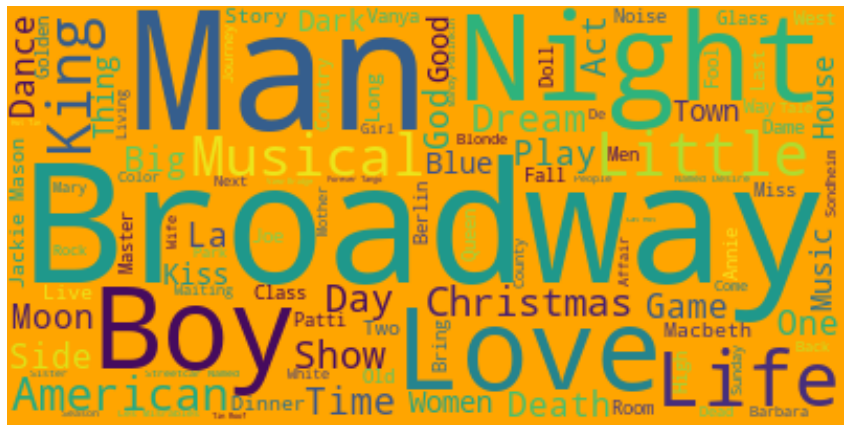

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(broadway["name"].unique()))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


In [ ]:
#Same as above, encode the name of the show by the number of performances a week and take the mean
broadway['name_by_gross'] = broadway.groupby("name")['gross'].transform("mean")
broadway.name_by_gross.describe()

count    2.773400e+04
mean     5.291706e+05
std      2.829678e+05
min      4.987500e+03
25%      3.141697e+05
50%      4.960533e+05
75%      7.053158e+05
max      1.429369e+06
Name: name_by_gross, dtype: float64

In [ ]:
#review new dataframe
broadway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27734 entries, 0 to 31295
Data columns (total 13 columns):
attendance         27734 non-null int64
capacity           27734 non-null int64
day                27734 non-null int64
gross              27734 non-null int64
gross potential    27734 non-null int64
month              27734 non-null int64
name               27734 non-null object
performances       27734 non-null int64
theatre            27734 non-null object
type               27734 non-null object
year               27734 non-null int64
theatre_cat        27734 non-null int64
name_by_gross      27734 non-null float64
dtypes: float64(1), int64(9), object(3)
memory usage: 3.0+ MB


# EDA

In [ ]:
#create X and evalute features for use in model
X = broadway.drop(["name", "theatre", "type"], axis=1)
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27734 entries, 0 to 31295
Data columns (total 10 columns):
attendance         27734 non-null int64
capacity           27734 non-null int64
day                27734 non-null int64
gross              27734 non-null int64
gross potential    27734 non-null int64
month              27734 non-null int64
performances       27734 non-null int64
year               27734 non-null int64
theatre_cat        27734 non-null int64
name_by_gross      27734 non-null float64
dtypes: float64(1), int64(9)
memory usage: 2.3 MB


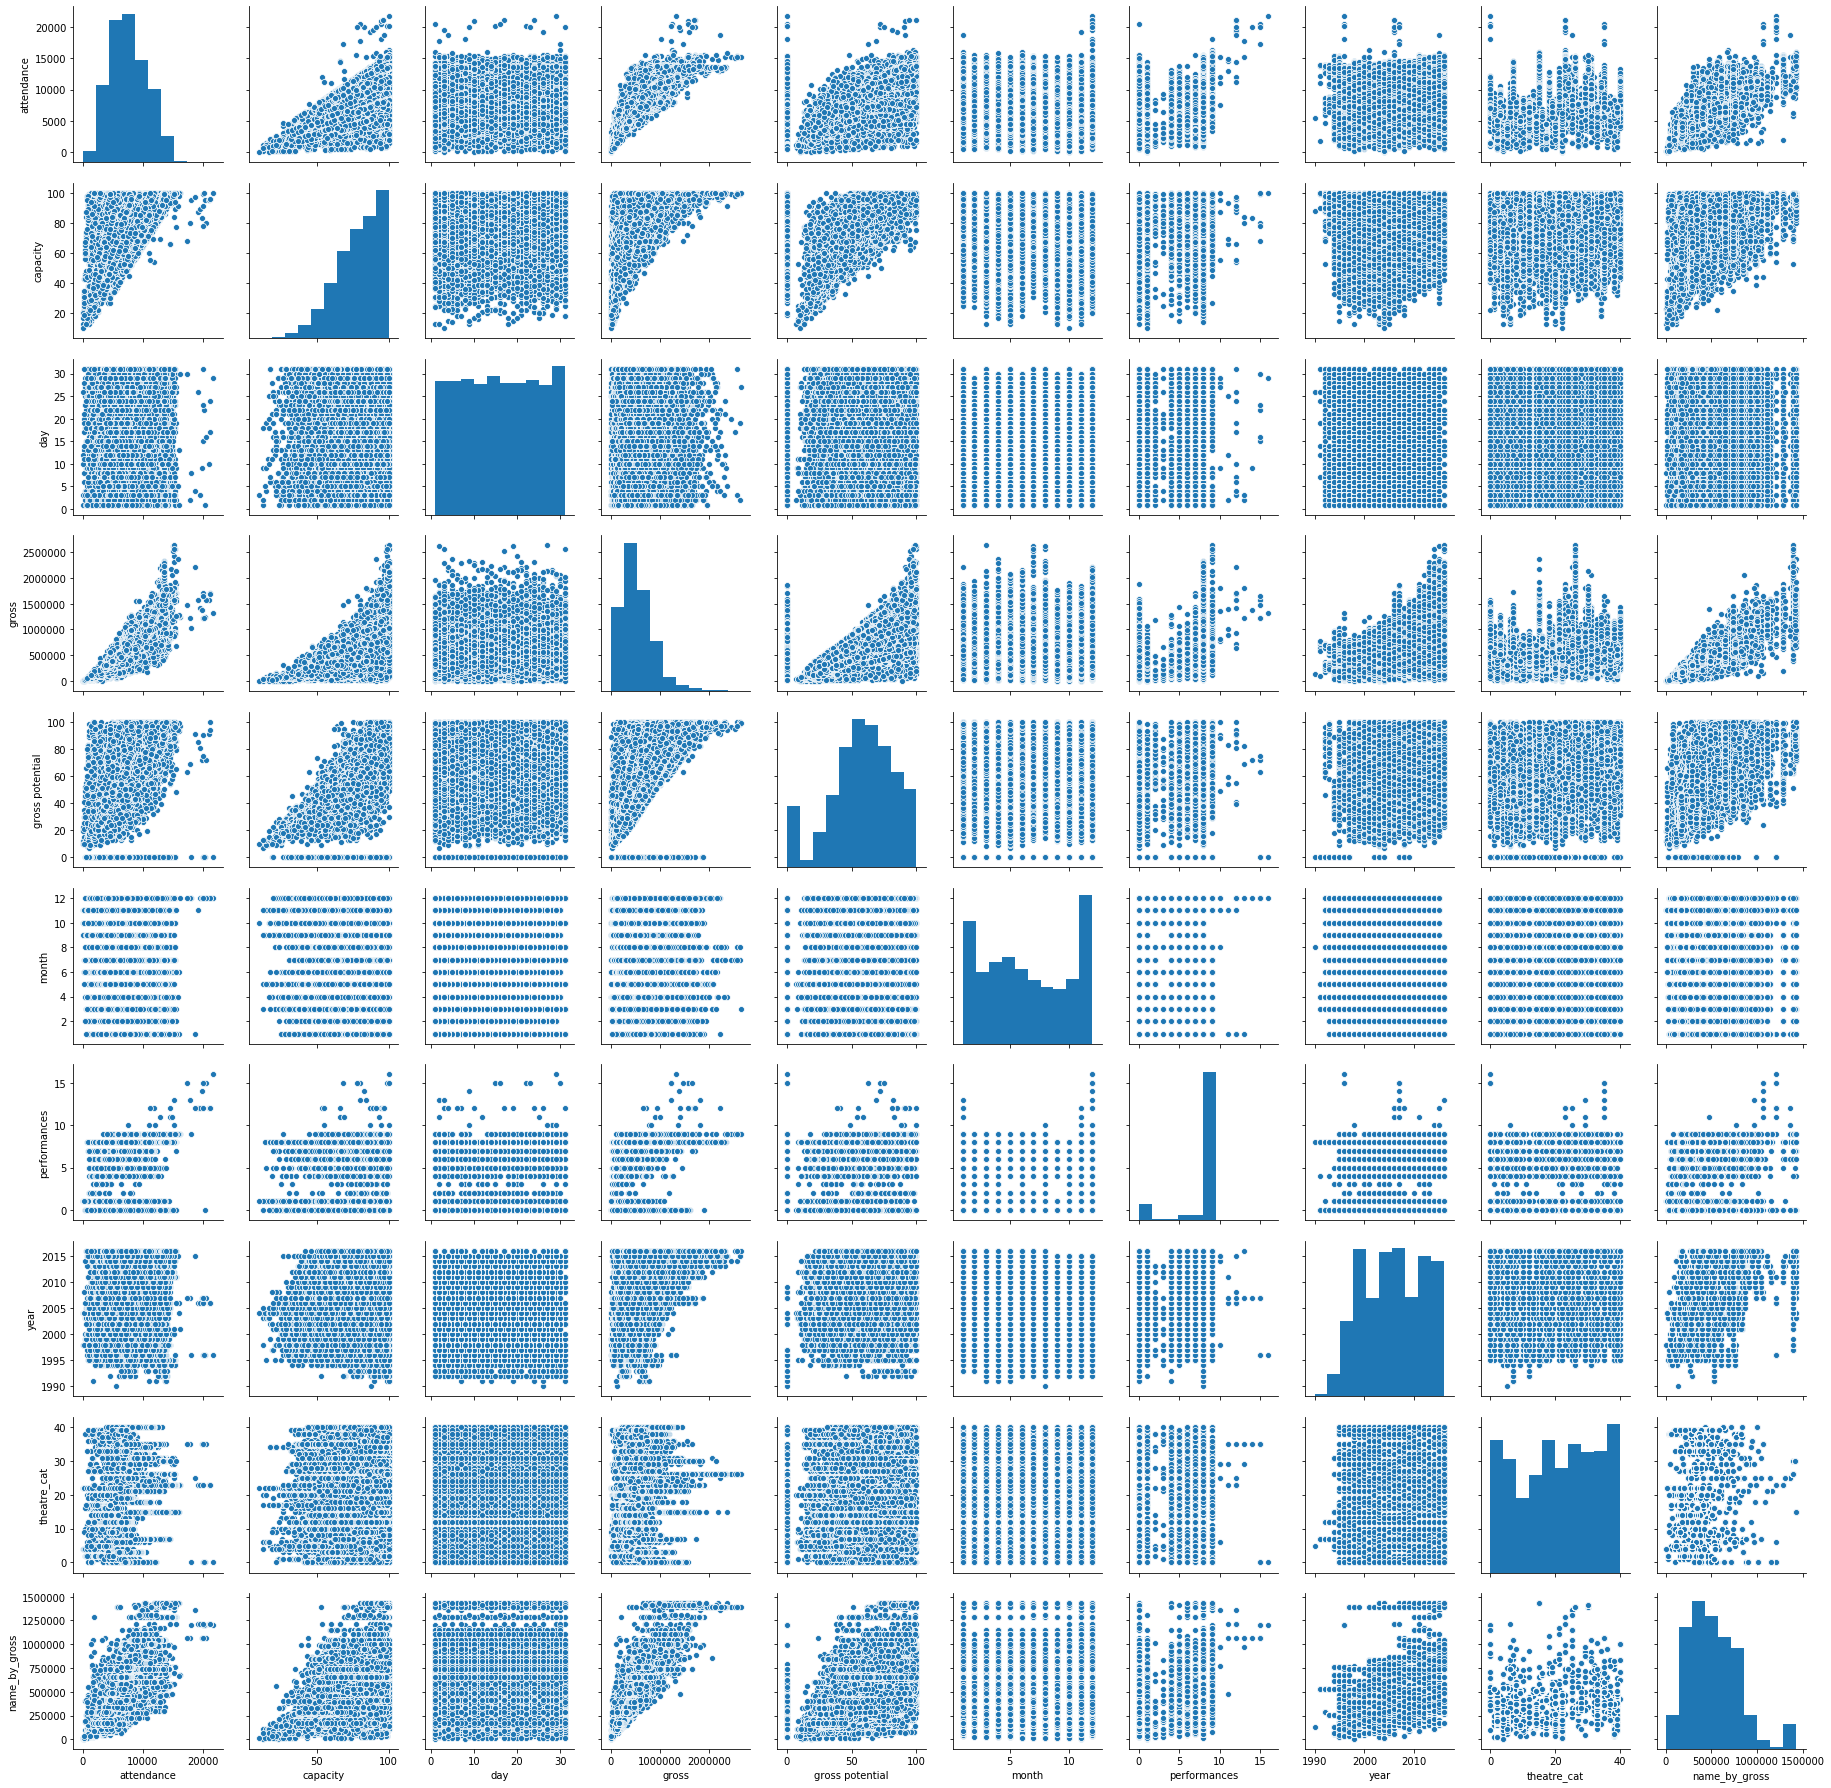

In [ ]:
#look at correlations and distributions of the data to select features for clustering model
sns.pairplot(X)
plt.show()

In [ ]:
#some variables look like strong candidates for feature selection. They have a wide range and pretty even distribution
#will re-define X to include these variables and exclude others
#X = X.drop(columns=["capacity"])

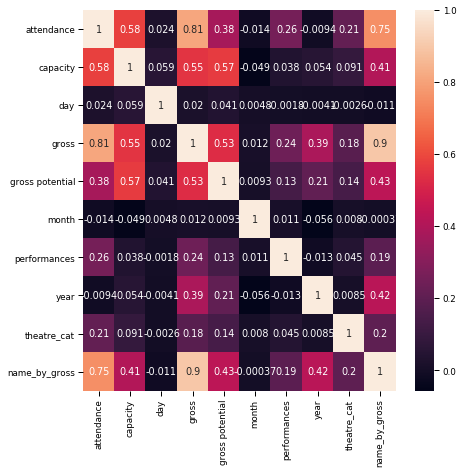

In [ ]:
#look at correlation 
#Had to set limits to view full heatmap
ax= sns.set_context('paper')
ax= plt.figure(figsize=(7,7))
broad_corr = X.corr()
ax=sns.heatmap(broad_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
#add constant and check vif for X
#import statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_sm = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF_factor,features
0,27.3,attendance
1,55.4,capacity
2,4.2,day
3,30.8,gross
4,11.5,gross potential
5,4.6,month
6,12.0,performances
7,53.8,year
8,4.1,theatre_cat
9,26.0,name_by_gross


In [ ]:
X = X.drop(columns=['year'])

In [ ]:
#add constant and check vif for X
X_sm = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF_factor,features
0,27.1,attendance
1,27.7,capacity
2,4.0,day
3,26.6,gross
4,11.5,gross potential
5,4.2,month
6,9.1,performances
7,4.0,theatre_cat
8,23.1,name_by_gross


In [ ]:
X = X.drop(columns=["day"])

In [ ]:
#add constant and check vif for X
X_sm = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF_factor,features
0,27.1,attendance
1,25.8,capacity
2,26.5,gross
3,11.5,gross potential
4,4.1,month
5,9.0,performances
6,4.0,theatre_cat
7,23.1,name_by_gross


In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Elbow Plot for K selection

In [ ]:
#create distortions for k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

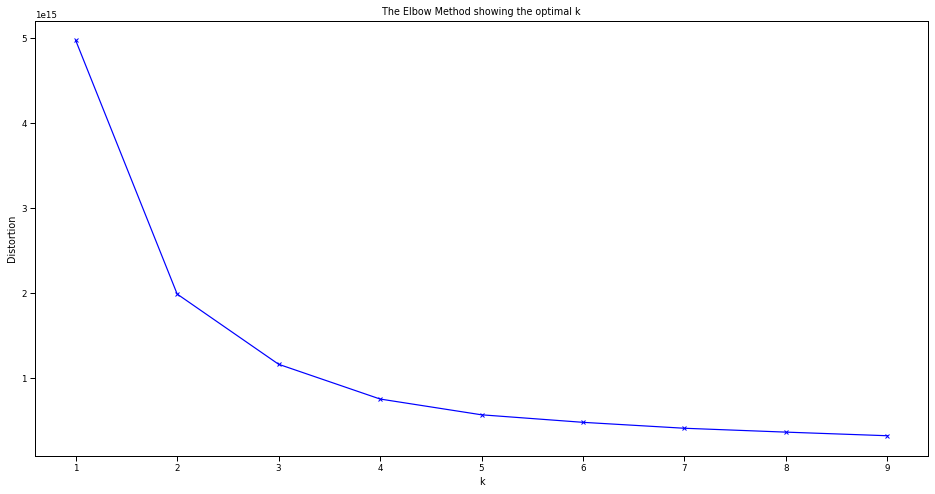

In [ ]:
#view elbow plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# K-Means

In [ ]:
#generate clusters with various k and review ARI
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
pred_6 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))
print("ARI for five cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_5)))
print("ARI for six cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_6)))

ARI for two cluster k-means: 0.14703547282630375
ARI for three cluster k-means: 0.12746241519255225
ARI for four cluster k-means: 0.12066812832616046
ARI for five cluster k-means: 0.09807390135702468
ARI for six cluster k-means: 0.08274292955877958


In [ ]:
#generate clusters with various k and review Silhouette Score
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
pred_6 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)


print("Silhouette for two cluster k-means: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette for three cluster k-means: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette for four cluster k-means: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("Silhouette for five cluster k-means: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("Silhouette for six cluster k-means: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))

Silhouette for two cluster k-means: 0.24066061629088267
Silhouette for three cluster k-means: 0.2509321656948989
Silhouette for four cluster k-means: 0.18572216799241803
Silhouette for five cluster k-means: 0.196133719999116
Silhouette for six cluster k-means: 0.1935541252200709


In [ ]:
#append clusters into dataframe for analysis
broadway['k_means_2'] = pred_2
broadway['k_means_3'] = pred_3

## Review 2 K-means

In [ ]:
print((broadway.groupby('k_means_2')[X.columns].mean().round(2)))

           attendance  capacity      gross  gross potential  month  \
k_means_2                                                            
0             5499.08     69.75  311783.17            45.55   6.49   
1             9977.62     87.35  771137.28            70.63   6.47   

           performances  theatre_cat  name_by_gross  
k_means_2                                            
0                  6.70        17.26      347827.70  
1                  7.69        23.92      731017.31  


In [ ]:
print((broadway.groupby('k_means_2')[X.columns].describe().T),round(2))

k_means_2                         0             1
attendance      count  1.460900e+04  1.312500e+04
                mean   5.499085e+03  9.977622e+03
                std    1.883761e+03  2.158008e+03
                min    7.300000e+01  1.923000e+03
                25%    4.199000e+03  8.289000e+03
                50%    5.400000e+03  9.911000e+03
                75%    6.740000e+03  1.149900e+04
                max    1.377400e+04  2.163100e+04
capacity        count  1.460900e+04  1.312500e+04
                mean   6.975371e+01  8.735101e+01
                std    1.544534e+01  9.642686e+00
                min    1.000000e+01  5.300000e+01
                25%    5.900000e+01  8.100000e+01
                50%    7.000000e+01  8.900000e+01
                75%    8.100000e+01  9.500000e+01
                max    1.000000e+02  1.000000e+02
gross           count  1.460900e+04  1.312500e+04
                mean   3.117832e+05  7.711373e+05
                std    1.338816e+05  2.802189e+05


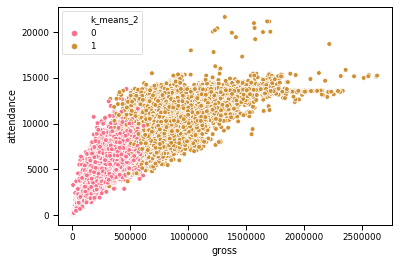

In [ ]:
# Scatterplot
sns.set_palette("husl", 8)
sns.scatterplot(x = "gross", y= "attendance", hue= "k_means_2", data=broadway )

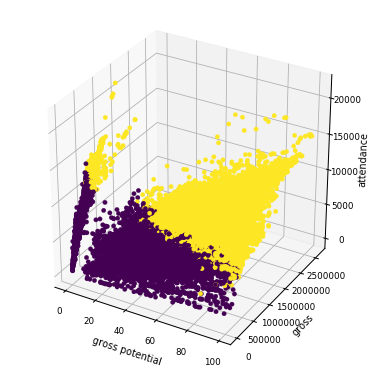

In [ ]:
# 3-D plot
#ax.sns.set_palette("husl")
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(broadway["gross potential"], broadway["gross"],broadway['attendance'],  c=broadway["k_means_2"], depthshade=False, linewidth=0.2)
ax.set_xlabel('gross potential')
ax.set_ylabel('gross')
ax.set_zlabel('attendance')
plt.show()

Two k-means had great numbers and very similar to 3 which is the true y. From this we can categorize shows into two categories and compare to any current marketing or booking strategies.

## Review 3 K

In [ ]:
print((broadway.groupby('k_means_3')[X.columns].mean().round(2)))

           attendance  capacity      gross  gross potential  month  \
k_means_3                                                            
0            10217.80     87.95  803103.05            71.91   6.45   
1             5856.50     70.11  341771.42            47.09   6.53   
2             5231.45     76.04  286877.02            46.90   6.39   

           performances  theatre_cat  name_by_gross  
k_means_3                                            
0                  7.88        24.14      753209.11  
1                  7.83        17.50      373292.06  
2                  0.27        19.05      345257.83  


In [ ]:
print(broadway.groupby('k_means_3')[X.columns].describe().T)

k_means_3                         0             1             2
attendance      count  1.156400e+04  1.366500e+04  2.505000e+03
                mean   1.021780e+04  5.856496e+03  5.231449e+03
                std    2.092373e+03  1.902170e+03  2.585044e+03
                min    4.138000e+03  7.880000e+02  7.300000e+01
                25%    8.552000e+03  4.463000e+03  3.364000e+03
                50%    1.019850e+04  5.710000e+03  5.037000e+03
                75%    1.167600e+04  7.112000e+03  6.857000e+03
                max    2.163100e+04  1.301500e+04  1.440800e+04
capacity        count  1.156400e+04  1.366500e+04  2.505000e+03
                mean   8.794578e+01  7.010735e+01  7.604471e+01
                std    9.275302e+00  1.501880e+01  1.747478e+01
                min    5.300000e+01  1.400000e+01  1.000000e+01
                25%    8.200000e+01  6.000000e+01  6.600000e+01
                50%    9.000000e+01  7.000000e+01  8.000000e+01
                75%    9.600000e+01  8.1

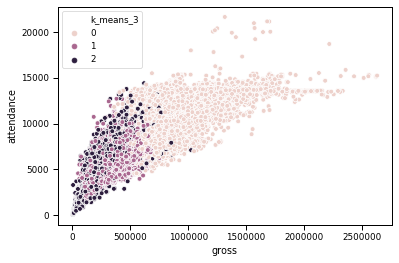

In [ ]:
# Scatterplot
sns.scatterplot(x = "gross", y= "attendance", hue= "k_means_3", data=broadway )

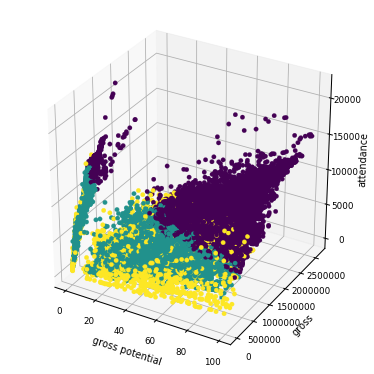

In [ ]:
# 3-D plot
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(broadway["gross potential"], broadway["gross"],broadway['attendance'],  c=broadway["k_means_3"], depthshade=False, linewidth=0.2)
ax.set_xlabel('gross potential')
ax.set_ylabel('gross')
ax.set_zlabel('attendance')
plt.show()

Three clusters as the true y. There are musicals, plays and Specials on Broadway. From this we can categorize shows to compare to any current marketing or booking strategies. What will generate more revenue. 

# Dendogram truncated

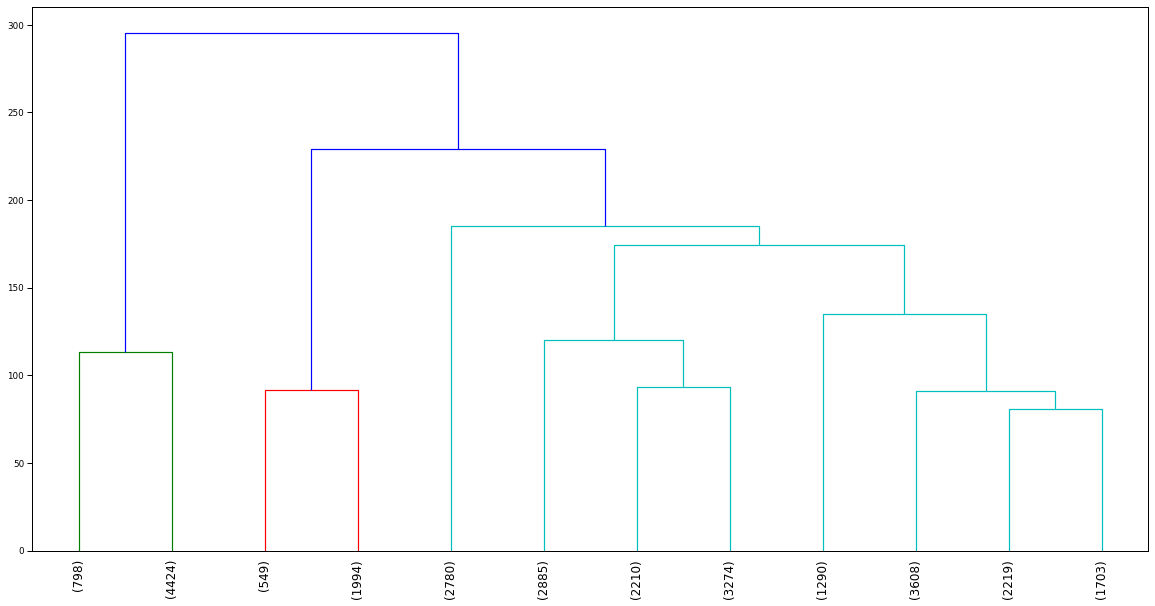

In [ ]:
#set a truncate to
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'),truncate_mode='lastp',
    p=12,
    leaf_rotation=90.)
plt.show()

# Conclusion
There is a clear advantage to booking Musicals or 2 over specials and plays. However, there are other factors that should be evaluated with this data. We should look at shows with A-list celebreties to compare with these clusters. Although this is a great framework for comparison, we could continue this work with more identifiers.

# QUESTIONS? 🎭